# An Analysis of Restaurant Reviews from the Yelp Dataset

In [3]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt

## Data Overview

For an overview of the Yelp Open Dataset, please refer to https://www.yelp.com/dataset. For this data analysis, and for the purposes of our research, we use a smaller subset of the data from the file /data/yelp_academic_dataset_review.json. This smaller dataset is stored in a csv file. For an overview of this derived dataset, please refer to the readme.

In [4]:
restaurant_csv_path = './data/yelp_restaurant_reviews.csv'

In [6]:
# long time to run
all_reviews = pd.read_csv('./data/yelp_restaurant_reviews.csv')

We would like to know some information about these reviews. Namely, what are the lengths of the reviews that we can expect? Knowing this will help us determine some parameters for the ML models that we will use later on.

In [7]:
# long time to run
lengths = all_reviews['text'].str.split().str.len().to_numpy()

### Distribution of Review Lengths

In [42]:
lengths = lengths[~np.isnan(lengths)]
np.save('data/review_lengths.npy', lengths)

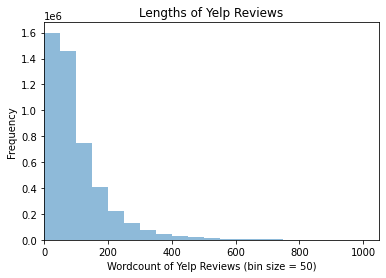

Maximum Review Length:  1041
Minimum Review Length:  1
Average Review Length:  102
Median Review Length:  72
Number of Reviews:  4779736


In [43]:
num_reviews = len(lengths)
min_length = np.nanmin(lengths)
max_length = np.nanmax(lengths)
mean_length = np.nanmean(lengths)
med_length = np.nanmedian(lengths)
bins = np.arange(0, 1000, 50)

plt.xlim([0, 1050])

plt.hist(lengths, bins=bins, alpha=0.5)
plt.title('Lengths of Yelp Reviews')
plt.xlabel('Wordcount of Yelp Reviews (bin size = 50)')
plt.ylabel('Frequency')

plt.show()
print("Maximum Review Length: ", int(max_length))
print("Minimum Review Length: ", int(min_length))
print("Average Review Length: ", int(mean_length))
print("Median Review Length: ", int(med_length))
print("Number of Reviews: ", num_reviews)

This histogram shows that, while the minimum length review is a single word, and the maximum length review is more than 1000 words, the large majority of reviews are concentrated under 200 words in length. Let's dive more deeply into those reviews.

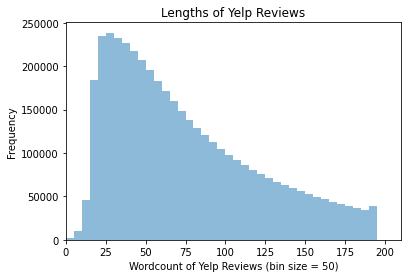

Number of reviews with length less than 200:  4222484
Proportion of reviews with length less than 200:  0.8834136446029656


In [44]:
bins = np.arange(0, 200, 5)

plt.xlim([0, 210])

plt.hist(lengths, bins=bins, alpha=0.5)
plt.title('Lengths of Yelp Reviews')
plt.xlabel('Wordcount of Yelp Reviews (bin size = 50)')
plt.ylabel('Frequency')

plt.show()
print("Number of reviews with length less than 200: ", np.sum(lengths <= 200))
print("Proportion of reviews with length less than 200: ", np.sum(lengths <= 200) / num_reviews)

### Distribution of stars

We should also examine the distribution of stars given within these ratings

In [45]:
review_stars = all_reviews['stars'].to_numpy()
review_stars = review_stars[~np.isnan(review_stars)]
np.save('data/review_stars.npy', review_stars)

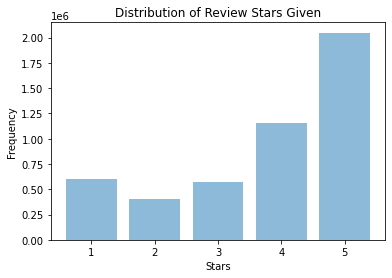

Frequencies:  [ 599691  404069  573941 1153807 2048229]


In [54]:
freqs = np.bincount(review_stars.astype(int))[1:]

plt.bar([1,2,3,4,5],freqs, alpha=0.5)
plt.title('Distribution of Review Stars Given')
plt.xlabel('Stars')
plt.ylabel('Frequency')
plt.xticks([1,2,3,4,5], [1,2,3,4,5])
plt.show()
print("Frequencies: ", freqs)

As you can see, the distribution of star ratings is not even across the range of stars. The majority of ratings are postiive, either a 4 or a 5. This likely has to do with self-selection bias. People are more likely to leave a review if they felt strongly about a restaurant, and of those people, they are more likely to leave a review if they had a positive experience.

In [53]:
num_pos_stars = (freqs[3] + freqs[4])
print("Proportion of positive stars: ", num_pos_stars/sum(freqs))

Proportion of positive stars:  0.6699188679209755


For the sake of training our model, this analysis motivates us to design a dataset with an equal distribution of star ratings, so that the model does not train by tending towards one star value. For the sake of consistency and simplicity, we are also motivated to use reviews whose lengths are within a certain range. We will use the range of 20 words to 120 words as our range. We believe that in most cases, a review must be of a sufficient length to give us training information, and to be assessable. We balance this with the desire to create the input size into our model a reasonable size.